In [49]:
import pandas as pd
import seaborn as sns

In [8]:
df = pd.read_csv("sales_data_sample.csv", encoding='latin1')


In [9]:
df.head(10)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium
5,10168,36,96.66,1,3479.76,10/28/2003 0:00,Shipped,4,10,2003,...,9408 Furth Circle,NaN,Burlingame,CA,94217,USA,NaN,Hirano,Juri,Medium
6,10180,29,86.13,9,2497.77,11/11/2003 0:00,Shipped,4,11,2003,...,"184, chausse de Tournai",NaN,Lille,NaN,59000,France,EMEA,Rance,Martine,Small
7,10188,48,100.00,1,5512.32,11/18/2003 0:00,Shipped,4,11,2003,...,"Drammen 121, PR 744 Sentrum",NaN,Bergen,NaN,N 5804,Norway,EMEA,Oeztan,Veysel,Medium
8,10201,22,98.57,2,2168.54,12/1/2003 0:00,Shipped,4,12,2003,...,5557 North Pendale Street,NaN,San Francisco,CA,NaN,USA,NaN,Murphy,Julie,Small
9,10211,41,100.00,14,4708.44,1/15/2004 0:00,Shipped,1,1,2004,...,"25, rue Lauriston",NaN,Paris,NaN,75016,France,EMEA,Perrier,Dominique,Medium


In [11]:
df.drop_duplicates(inplace=True)


In [13]:
df.dtypes

ORDERNUMBER           int64
QUANTITYORDERED       int64
PRICEEACH           float64
ORDERLINENUMBER       int64
SALES               float64
ORDERDATE            object
STATUS               object
QTR_ID                int64
MONTH_ID              int64
YEAR_ID               int64
PRODUCTLINE          object
MSRP                  int64
PRODUCTCODE          object
CUSTOMERNAME         object
PHONE                object
ADDRESSLINE1         object
ADDRESSLINE2         object
CITY                 object
STATE                object
POSTALCODE           object
COUNTRY              object
TERRITORY            object
CONTACTLASTNAME      object
CONTACTFIRSTNAME     object
DEALSIZE             object
dtype: object

In [14]:
df.isna().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [23]:
#dealing with nan values 
df=df.drop(columns='ADDRESSLINE2')
df=df.drop(columns='TERRITORY')
df=df.drop(columns='POSTALCODE')
df=df.drop(columns='STATE')

In [27]:
#studying sales in usa in year 2003
df2=df[(df['COUNTRY']=='USA')& (df['YEAR_ID']==2003)]

In [53]:
df2.drop(columns='PHONE')

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,ADDRESSLINE1,CITY,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,Motorcycles,95,S10_1678,Land of Toys Inc.,897 Long Airport Avenue,NYC,USA,Yu,Kwai,Small
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,Motorcycles,95,S10_1678,Toys4GrownUps.com,78934 Hillside Dr.,Pasadena,USA,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,Motorcycles,95,S10_1678,Corporate Gift Ideas Co.,7734 Strong St.,San Francisco,USA,Brown,Julie,Medium
5,10168,36,96.66,1,3479.76,10/28/2003 0:00,Shipped,4,10,2003,Motorcycles,95,S10_1678,Technics Stores Inc.,9408 Furth Circle,Burlingame,USA,Hirano,Juri,Medium
8,10201,22,98.57,2,2168.54,12/1/2003 0:00,Shipped,4,12,2003,Motorcycles,95,S10_1678,Mini Wheels Co.,5557 North Pendale Street,San Francisco,USA,Murphy,Julie,Small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2748,10168,39,82.91,17,3233.49,10/28/2003 0:00,Shipped,4,10,2003,Planes,74,S700_4002,Technics Stores Inc.,9408 Furth Circle,Burlingame,USA,Hirano,Juri,Medium
2772,10131,21,41.71,7,875.91,6/16/2003 0:00,Shipped,2,6,2003,Planes,49,S72_1253,Gift Ideas Corp.,2440 Pompton St.,Glendale,USA,Lewis,Dan,Small
2773,10143,37,50.65,10,1874.05,8/10/2003 0:00,Shipped,3,8,2003,Planes,49,S72_1253,Mini Creations Ltd.,4575 Hillside Dr.,New Bedford,USA,Tam,Wing C,Small
2800,10142,39,44.23,5,1724.97,8/8/2003 0:00,Shipped,3,8,2003,Ships,54,S72_3212,Mini Gifts Distributors Ltd.,5677 Strong St.,San Rafael,USA,Nelson,Valarie,Small


In [54]:
df2.head(10)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,USA,Yu,Kwai,Small
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,USA,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,95,S10_1678,Corporate Gift Ideas Co.,6505551386,7734 Strong St.,San Francisco,USA,Brown,Julie,Medium
5,10168,36,96.66,1,3479.76,10/28/2003 0:00,Shipped,4,10,2003,...,95,S10_1678,Technics Stores Inc.,6505556809,9408 Furth Circle,Burlingame,USA,Hirano,Juri,Medium
8,10201,22,98.57,2,2168.54,12/1/2003 0:00,Shipped,4,12,2003,...,95,S10_1678,Mini Wheels Co.,6505555787,5557 North Pendale Street,San Francisco,USA,Murphy,Julie,Small
29,10140,37,100.00,11,7374.10,7/24/2003 0:00,Shipped,3,7,2003,...,214,S10_1949,Technics Stores Inc.,6505556809,9408 Furth Circle,Burlingame,USA,Hirano,Juri,Large
31,10163,21,100.00,1,4860.24,10/20/2003 0:00,Shipped,4,10,2003,...,214,S10_1949,Classic Legends Inc.,2125558493,5905 Pompton St.,NYC,USA,Hernandez,Maria,Medium
33,10183,23,100.00,8,5372.57,11/13/2003 0:00,Shipped,4,11,2003,...,214,S10_1949,"Classic Gift Ideas, Inc",2155554695,782 First Street,Philadelphia,USA,Cervantes,Francisca,Medium
54,10107,39,99.91,5,3896.49,2/24/2003 0:00,Shipped,1,2,2003,...,118,S10_2016,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,USA,Yu,Kwai,Medium
57,10145,37,100.00,9,5192.95,8/25/2003 0:00,Shipped,3,8,2003,...,118,S10_2016,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,USA,Young,Julie,Medium


In [55]:
#which orderline numbers have the best sales
df2.groupby('ORDERLINENUMBER')['SALES'].mean().sort_values(ascending=False)


ORDERLINENUMBER
17    4674.158000
11    4125.718235
15    4016.025833
12    4006.315714
16    3986.331818
5     3877.274138
4     3845.539032
10    3793.748421
2     3719.818108
14    3602.888333
7     3353.889583
13    3348.806154
9     3301.177368
3     3260.762121
1     3223.715000
8     3128.921304
6     3069.724286
18    2066.850000
Name: SALES, dtype: float64

<Axes: xlabel='SALES', ylabel='Count'>

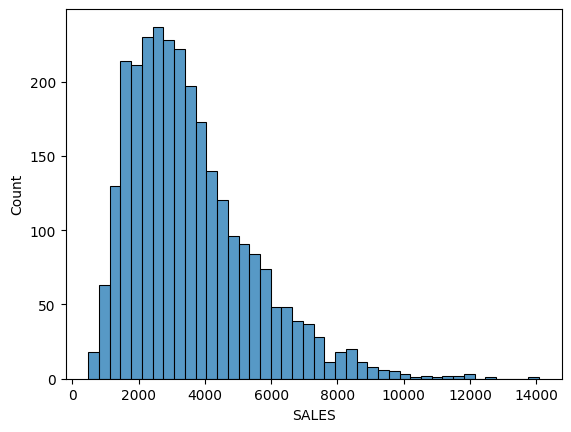

In [56]:
#distribution of sales 
sns.histplot(df['SALES'])

In [58]:
#sales on eatch month
df2.groupby('MONTH_ID')['SALES'].mean().sort_values(ascending=False)

MONTH_ID
4     4955.482000
6     3843.618000
12    3760.774651
3     3655.810000
7     3618.297857
11    3618.243523
10    3562.413968
8     3429.222292
2     3222.970000
9     3195.522917
1     3166.216667
5     2603.663077
Name: SALES, dtype: float64

In [61]:
#products most saled
df2.groupby('PRODUCTCODE')['SALES'].mean().sort_values(ascending=False)

PRODUCTCODE
S12_1099    8516.890000
S12_3891    8182.015000
S12_1108    8018.482500
S18_2238    6679.102500
S18_1984    6095.546667
               ...     
S24_1937    1335.385000
S24_3969    1323.550000
S32_2206    1225.463333
S24_2840    1214.030000
S24_2972    1037.350000
Name: SALES, Length: 109, dtype: float64

In [62]:
#cities best sales 
df2.groupby('CITY')['SALES'].mean().sort_values(ascending=False)

CITY
New Haven        5312.345000
NYC              4065.815283
Los Angeles      4026.523333
Boston           3983.173750
White Plains     3868.295000
Nashua           3805.735000
Philadelphia     3747.804444
Burlingame       3597.837931
Pasadena         3546.388235
San Rafael       3428.298519
San Francisco    3409.910732
Bridgewater      3264.475000
Brickhaven       3251.519231
New Bedford      3136.900571
Brisbane         3100.002727
Glendale         2757.768333
Burbank          2744.853333
Las Vegas        2603.663077
Name: SALES, dtype: float64